In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv, norm

# data source

In [2]:
source = "star"

# read LightSource.txt

In [3]:
with open("test/{}/LightSource.txt".format(source),'r') as f:
    L = []
    for l in f.readlines():
        l = l.replace('\n','').replace('(','').replace(')','').split(' ')[1].split(',')
        l = [int(i) for i in l]
        L.append(l)

# to array        
L = np.array(L)

In [4]:
L

array([[  323,    35,   113],
       [  531,  -442,   435],
       [   52,  -115,   121],
       [-1012,  -744,   742],
       [ -245,    54,   125],
       [ -342, -2850,  1071]])

# read images

In [17]:
img1 = cv2.imread('test/{}/pic1.bmp'.format(source), 0)
img2 = cv2.imread('test/{}/pic2.bmp'.format(source), 0)
img3 = cv2.imread('test/{}/pic3.bmp'.format(source), 0)
img4 = cv2.imread('test/{}/pic4.bmp'.format(source), 0)
img5 = cv2.imread('test/{}/pic5.bmp'.format(source), 0)
img6 = cv2.imread('test/{}/pic6.bmp'.format(source), 0)

In [25]:
img1.reshape(-1).shape

(57600,)

In [16]:
I = np.vstack((img1,img2,img3,img4,img5,img6))
I.shape

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 57600 and the array at index 1 has size 240

# KdN
https://stackoverflow.com/questions/49357417/why-is-numpy-linalg-pinv-preferred-over-numpy-linalg-inv-for-creating-invers

In [7]:
KdN = pinv((L.T@L))@L.T@I
KdN.shape

(3, 57600)

In [14]:
# norm_KdN = norm(KdN)
# norm_KdN

In [13]:
# N = KdN/norm_KdN

In [10]:
from HW1 import normal_visualization

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


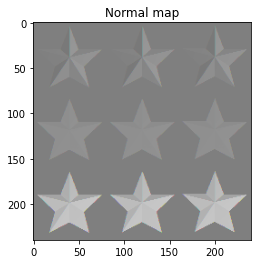

In [11]:
normal_visualization(KdN)

In [12]:
np.sqrt(518400/3)

415.69219381653056